# HUMAN ACTIVITY RECOGNITION 
![HAR](HAR.jpg)

# Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
    - 2.1 [Data Background](#section201) 
    - 2.2 [Feture Selection](#section202)
    - 2.3 [Importing Packages](#section203)
    - 2.4 [Loading Dataset](#section204)<br> 
3. [Data Cleaning](#section3)
    - 3.1 [Check for Duplicates](#section301)
    - 3.2 [Check for NaN/Null values](#section302)
    - 3.3 [Check for imbalance data](#section303) <br>
4. [Exploratory Data Analysis](#section4)
    - 4.1 [Distribution of exploratory variable/ features](#section401)
    - 4.2 [Stationary and Moving activity plot](#section402)
    - 4.3 [Plotting - Position of Gravity Acceleration component](#section403)
    - 4.4 [Finding the Correlation/ Relationships between the features](#section404)
5. [Fitting some Classification models](#section5)
    - 5.1 [Preparing X and y using pandas](#section501)<br>
    - 5.2 [Splitting X and y into training and test datasets](#section502)<br>
    - 5.3 [Evaluating with multiple classifications models](#section503)<br>
6. [Model evaluation](#section6)<br>
7. [Feature Selection](#section7)<br>
8. [Conclusion](#section8)<br>

## 1. Problem Statement <a id=section1></a> 

We have to build a model that predicts the human activities such as _Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying_ based on smartphones sensors data.
- We want to find a function that given data from smartphone sensors __predicts the activity of person__.

- Visualize the __relationship__ between the _features_ and the _response_ using different plots.

## 2. Data Loading and Description <a id=section2></a> 

__2.1 Data Background__ <a id=section201></a><br>
This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.Data is collected from the http://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions# website.

__2.2 Feature Selection__ <a id=section202></a> 

The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ. These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz. Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise. Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz. 

Subsequently, the body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). Also the magnitude of these three-dimensional signals were calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag). 

Finally a Fast Fourier Transform (FFT) was applied to some of these signals producing fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag. (Note the 'f' to indicate frequency domain signals). 

__These signals were used to estimate variables of the feature vector for each pattern:
'-XYZ' is used to denote 3-axial signals in the X, Y and Z directions.__
- tBodyAcc-XYZ
- tGravityAcc-XYZ
- tBodyAccJerk-XYZ
- tBodyGyro-XYZ
- tBodyGyroJerk-XYZ
- tBodyAccMag
- tGravityAccMag
- tBodyAccJerkMag
- tBodyGyroMag
- tBodyGyroJerkMag
- fBodyAcc-XYZ
- fBodyAccJerk-XYZ
- fBodyGyro-XYZ
- fBodyAccMag
- fBodyAccJerkMag
- fBodyGyroMag
- fBodyGyroJerkMag

__The set of variables that were estimated from these signals are:__

- mean(): Mean value
- std(): Standard deviation
- mad(): Median absolute deviation 
- max(): Largest value in array
- min(): Smallest value in array
- sma(): Signal magnitude area
- energy(): Energy measure. Sum of the squares divided by the number of values. 
- iqr(): Interquartile range 
- entropy(): Signal entropy
- arCoeff(): Autorregresion coefficients with Burg order equal to 4
- correlation(): correlation coefficient between two signals
- maxInds(): index of the frequency component with largest magnitude
- meanFreq(): Weighted average of the frequency components to obtain a mean frequency
- skewness(): skewness of the frequency domain signal 
- kurtosis(): kurtosis of the frequency domain signal 
- bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.
- angle(): Angle between to vectors.

__Additional vectors obtained by averaging the signals in a signal window sample. These are used on the angle() variable:__

- gravityMean
- tBodyAccMean
- tBodyAccJerkMean
- tBodyGyroMean
- tBodyGyroJerkMean

__For each record it is provided:__
- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope. 
- A 563-feature vector with time and frequency domain variables. 
- Its activity label.

__2.3 Importing Packages__ <a id=section203></a> 

In [1]:
import itertools
import time
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'DejaVu Sans'
import seaborn as sns

# To be able to save images on Machine
import matplotlib
from matplotlib import pyplot
%matplotlib inline   

#from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold

__2.4 Loding Dataset__ <a id=section204></a> 

In [2]:
df = pd.read_csv('Human_activity_recognition.csv')
print(df.shape)
df.head()

(3609, 563)


,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


## 3. Data Cleaning <a id="section3"></a>

__3.1 Check for Duplicates__ <a id="section301"></a>

In [22]:
print('No of duplicates in dataset: {}'.format(sum(df.duplicated())))

No of duplicates in dataset: 0


__3.2 Check for NaN/Null Values__ <a id="section302"></a>

In [5]:
print('Have {} NaN/Null values in dataset'.format(df.isnull().values.sum()))

Have 0 NaN/Null values in dataset


__3.3 Check for Imbalance Data__ <a id="section303"></a>

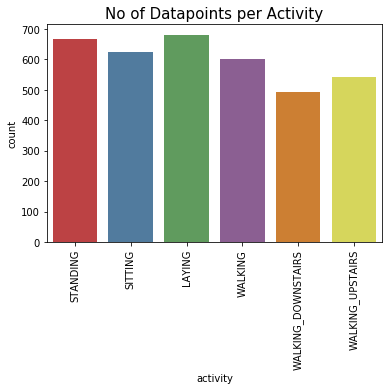

In [23]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(df.activity)
plt.xticks(rotation=90)
plt.show()

#### Observation 
Our data is almost balanced for all activities.

## 4. Exploratory Data Analysis <a id=section4></a> 

In [7]:
df.shape  #Check shape of dataset  

(3609, 563)

In [8]:
df.info()  #Check information about datatypes present in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Columns: 563 entries, rn to angle.Z.gravityMean
dtypes: float64(561), int64(1), object(1)
memory usage: 15.5+ MB


In [9]:
df.describe(include="all")  # Check for escriptive statictics.

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
count,3609.000000,3609,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,...,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000
unique,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,LAYING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5152.430590,NaN,0.274544,-0.017415,-0.109195,-0.608457,-0.506265,-0.614482,-0.634634,-0.521660,...,0.128804,-0.300815,-0.619400,0.007561,0.009484,0.029185,-0.010632,-0.496977,0.060040,-0.050202
std,2975.767839,NaN,0.063589,0.042589,0.056218,0.439157,0.501627,0.399514,0.413194,0.485282,...,0.240278,0.317963,0.308303,0.332249,0.448971,0.613615,0.490830,0.509336,0.311308,0.263935
min,7.000000,NaN,-0.521000,-1.000000,-0.926000,-1.000000,-0.999000,-1.000000,-1.000000,-0.999000,...,-0.786000,-0.968000,-0.995000,-0.969000,-0.997000,-1.000000,-0.993000,-0.999000,-1.000000,-0.971000
25%,2570.000000,NaN,0.262000,-0.025200,-0.122000,-0.992000,-0.976000,-0.979000,-0.993000,-0.976000,...,-0.015800,-0.533000,-0.836000,-0.118000,-0.281000,-0.478000,-0.398000,-0.816000,-0.015600,-0.122000
50%,5158.000000,NaN,0.277000,-0.017200,-0.109000,-0.939000,-0.812000,-0.844000,-0.946000,-0.816000,...,0.132000,-0.341000,-0.706000,0.007740,0.009830,0.029600,-0.013400,-0.716000,0.183000,-0.005260
75%,7727.000000,NaN,0.287000,-0.011000,-0.098000,-0.254000,-0.051700,-0.283000,-0.306000,-0.084500,...,0.290000,-0.118000,-0.501000,0.142000,0.309000,0.554000,0.374000,-0.522000,0.252000,0.104000


In [10]:
# Find the unique activities performed by subjects
activity_list = df["activity"].unique()
print("Unique Activity : {}".format(activity_list))

Unique Activity : ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [11]:
df.select_dtypes(include=['object']).dtypes

activity    object
dtype: object

#### Observation
- There is total 563 Columns and 3609 records
- Except activity columns all other clumn are of number type.
- Top Most activity is __Laying__ and overall 6 different activities are present in dataset.
- All Numeric type column are ranging from -1 to 1 . This implies data is standarised.


In [12]:
col = df.columns.tolist()
#print(col)

__4.1 Distribution of exploratory variable/ features__ <a id="section401"></a>

Lets find out the distribution of some important acceleration signal feature like _tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag_.

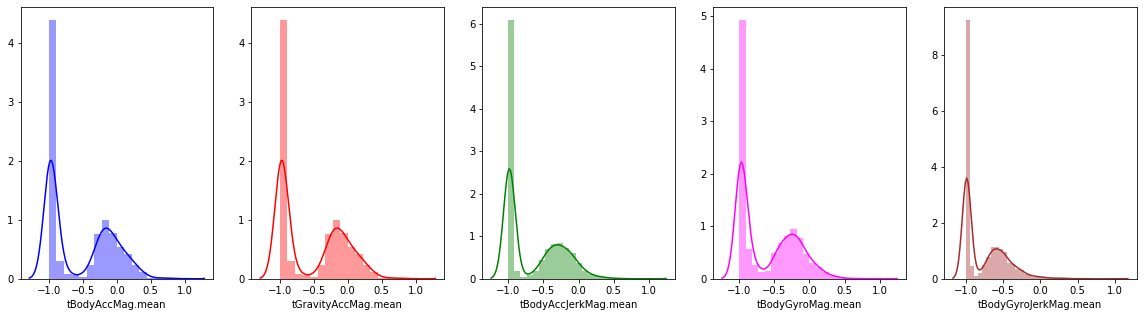

In [3]:
fig, [ax1,ax2,ax3,ax4,ax5] = plt.subplots(1,5,figsize=(20,5))

sns.distplot(df['tBodyAccMag.mean'], color='blue', ax=ax1)
sns.distplot(df['tGravityAccMag.mean'], color='red', ax=ax2)
sns.distplot(df['tBodyAccJerkMag.mean'], color='green', ax=ax3)
sns.distplot(df['tBodyGyroMag.mean'], color='magenta', ax=ax4)
sns.distplot(df['tBodyGyroJerkMag.mean'], color='brown', ax=ax5)

__Observation__ <br>
<p>Looking at this distribution for acceleration signal feature.One can distinguish there are mainly two type of activity is found.Stationary and Moving activity.</p>

__4.2 Stationary and Moving activity plot__ <a id="section402"></a>

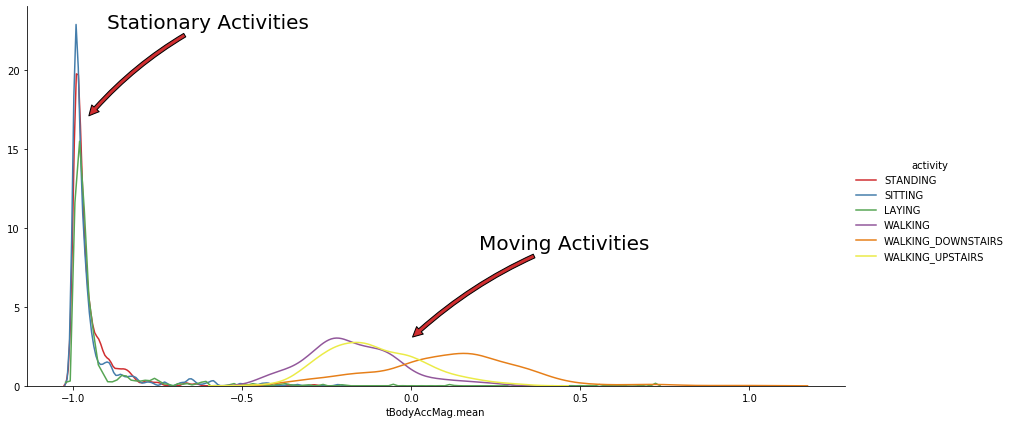

In [4]:
#tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(df, hue='activity', height=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag.mean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

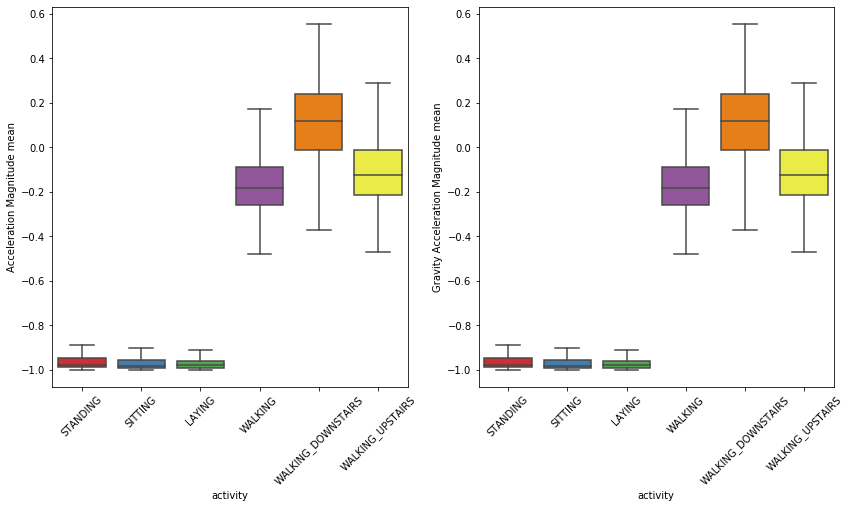

In [25]:
fig = plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
sns.boxplot(x='activity', y='tBodyAccMag.mean',data=df, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.boxplot(x='activity', y='tGravityAccMag.mean',data=df, showfliers=False, saturation=1)
plt.ylabel('Gravity Acceleration Magnitude mean')
plt.xticks(rotation=45)
plt.show()

__Observations:__
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.

__4.3 Plotting - Position of Gravity Acceleration component__ <a id="section403"></a><br>
Lets plots the angle between two vector / position of acceleration signal.

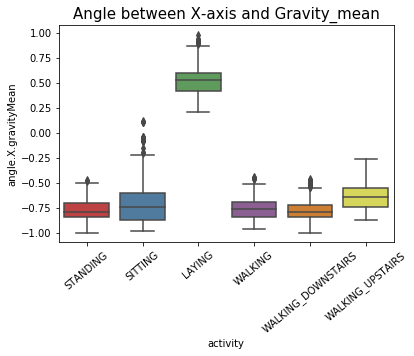

In [17]:
sns.boxplot(x='activity', y='angle.X.gravityMean', data=df)
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__Observations:__
- If angle.X.gravityMean > 0 then Activity is Laying.
- We can classify all datapoints belonging to Laying activity with just a single if else statement.

__4.4 Finding the Correlation/ Relationships between the features__ <a id="section404"></a><br>

In [6]:
features = df.loc[:,df.columns != 'activity']   #exclude the activity column
#Calculate the correlation values
correlated_values = features.corr()
#stack the data and convert to a dataframe
correlated_values = (correlated_values.stack().to_frame().reset_index()
                    .rename(columns={'level_0': 'Feature_1', 'level_1': 'Feature_2', 0:'Correlations'}))
#Calculate the absolute correlation between values.
correlated_values['abs_correlation'] = correlated_values.Correlations.abs()
correlated_values.head()

,Feature_1,Feature_2,Correlations,abs_correlation
0,rn,rn,1.000000,1.000000
1,rn,tBodyAcc.mean.X,-0.004802,0.004802
2,rn,tBodyAcc.mean.Y,-0.008770,0.008770
3,rn,tBodyAcc.mean.Z,-0.009819,0.009819
4,rn,tBodyAcc.std.X,-0.028609,0.028609


__Find the correlation of feature having coefficient greater than .80 .__

In [85]:
#Picking most correlated features
corr_fields = correlated_values.sort_values('Correlations', ascending = False).query('abs_correlation>0.8')
print(corr_fields.shape)
corr_fields.sample(6)

(46386, 4)


,Feature_1,Feature_2,Correlations,abs_correlation
185427,fBodyAcc.bandsEnergy.1.24.1,fBodyBodyGyroMag.mean,0.878634,0.878634
80156,tBodyGyro.iqr.Z,fBodyAccJerk.mad.Y,0.824653,0.824653
195030,fBodyAccJerk.mean.Z,tBodyAcc.sma,0.905097,0.905097
298562,fBodyBodyGyroMag.mad,tBodyGyro.iqr.X,0.883675,0.883675
130817,tBodyAccJerkMag.sma,fBodyGyro.max.X,0.827636,0.827636
6531,tBodyAcc.max.Y,fBodyAccJerk.std.Y,0.908447,0.908447


__Find the correlation of feature having coefficient less than .80 .__

In [86]:
#Picking most correlated features
non_corr_fields = correlated_values.sort_values('Correlations', ascending = False).query('abs_correlation<0.8')
print(non_corr_fields.shape)
non_corr_fields.sample(6)

(269458, 4)


,Feature_1,Feature_2,Correlations,abs_correlation
130448,tBodyAccJerkMag.sma,tGravityAcc.entropy.Y,-0.258758,0.258758
241965,fBodyGyro.mad.X,fBodyAcc.bandsEnergy.17.24,0.732687,0.732687
28988,tGravityAcc.max.Y,fBodyAcc.bandsEnergy.17.32.1,-0.384377,0.384377
42974,tGravityAcc.arCoeff.Z.3,tBodyGyroJerkMag.arCoeff1,0.316629,0.316629
160931,fBodyAcc.iqr.Y,tBodyGyroJerk.correlation.X.Z,-0.074755,0.074755
7150,tBodyAcc.max.Z,fBodyAccJerk.bandsEnergy.33.48.1,0.706075,0.706075


## 5. Fitting some Classification models <a id="section5"></a>

__5.1 Preparing X and y using pandas__ <a id="section501"></a>

In [7]:
X = df.loc[:,df.columns != 'activity']
X.head()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,-0.983,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,-0.985,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,-0.992,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,-0.888,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,-0.997,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [8]:
y = df["activity"]

Encode the activities with LabelEncoder()

In [89]:
le=LabelEncoder()
y=le.fit_transform(y)
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
y

{'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}


array([2, 2, 2, ..., 5, 5, 4])

__5.2 Splitting X and y into training and test datasets__ <a id="section502"></a>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print("Shape of Train X dataset is {}".format(X_train.shape))
print("Shape of Train y feature is {}".format(y_train.shape))
print("Shape of Test X dataset is {}".format(X_test.shape))
print("Shape of Train y feature is {}".format(y_test.shape))

Shape of Train X dataset is (2887, 562)
Shape of Train y feature is (2887,)
Shape of Test X dataset is (722, 562)
Shape of Train y feature is (722,)


__5.3 Evaluating with Different regression Models__ <a id="section403"></a>

I have created different regression models to test and train the data. Models used

- Logistic Regression: LogisticRegression()
- Decision Tree Classification: DecisionTreeClassifier()
- Random Forest Classifier: RandomForestClassifier()
- Gradient Boost Classification: GradientBoostingClassifier()
- Linear SVM 
- SVM (Radial)
- Naive Bayes
- K Nearest Neighbours


In [10]:
def get_predictions(clf, X_train, y_train, X_test,parameters):
    # create classifier
    start_time = time.time()
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    #y_pred_prob = clf.predict_proba(X_test)
    
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    end_time = time.time()
    time1 = end_time-start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(time1))
    
    start_time = time.time()
    grid_model = GridSearchCV(clf, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
    grid_model.fit(X_train, y_train)   
    y_pred_grid = grid_model.predict(X_test)
    end_time = time.time()
    time2 = end_time-start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(time2))
    
    
    return y_pred,y_pred_grid,grid_model

def print_scores(y_test,y_pred,y_pred_grid,grid_result):
    result = dict()
    precision, recall, f_score, _ = error_metric(y_test, y_pred, average = 'weighted')
    precision_g, recall_g, f_score_g, _ = error_metric(y_test, y_pred_grid, average = 'weighted')
    accuracy = metrics.accuracy_score(y_test,y_pred)
    accuracy_g = metrics.accuracy_score(y_test,y_pred_grid)
    confusion_m = metrics.confusion_matrix(y_test,y_pred)
    confusion_m_g = metrics.confusion_matrix(y_test,y_pred_grid)
    classification_report = metrics.classification_report(y_test, y_pred)
    classification_report_g = metrics.classification_report(y_test, y_pred_grid)
    
    fig, axList = plt.subplots(nrows=1, ncols=2)
    sns.heatmap(confusion_m, annot=True, ax=axList[0], fmt='d')
    axList[0].set(title="Model W/O GS")
    sns.heatmap(confusion_m_g, annot=True, ax=axList[1], fmt='d')
    axList[1].set(title="Model with GS")
    
    result["precision"] = precision
    result["recall"] = recall
    result["f1_score"] = f_score
    result["accuracy"] = accuracy
    result["precision_g"] = precision_g
    result["recall_g"] = recall_g
    result["f1_score_g"] = f_score_g
    result["accuracy_g"] = accuracy_g
    result["grid_best_score"] = grid_result.best_score_
    
    print("++++++++++++++Model Without Grid Search++++++++++++++++++")
    print(classification_report)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("++++++++++++++Model With Grid Search+++++++++++++++++++=+")
    print(classification_report_g)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    
    return result
    #print("ROC AUC: {}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1])))

__Logistic Regression__ 

C:\DATA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


train-set confusion matrix:
 [[525   4   0   0   0   0]
 [  0 412  78   0   0   1]
 [  0  78 472   0   0   0]
 [  0   0   0 455  14   8]
 [  0   0   0   8 372  16]
 [  0   0   0  11  29 404]]
training_time(HH:MM:SS.ms) - 7.418909549713135


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.1min finished
C:\DATA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


training_time(HH:MM:SS.ms) - 77.43287491798401


++++++++++++++Model Without Grid Search++++++++++++++++++
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       152
           SITTING       0.84      0.86      0.85       132
          STANDING       0.84      0.82      0.83       118
           WALKING       0.92      0.96      0.94       126
WALKING_DOWNSTAIRS       0.91      0.92      0.91        97
  WALKING_UPSTAIRS       0.91      0.86      0.88        97

          accuracy                           0.91       722
         macro avg       0.90      0.90      0.90       722
      weighted avg       0.91      0.91      0.91       722

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++Model With Grid Search+++++++++++++++++++=+
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       152
           SITTING       0.84      0.86      0.85    

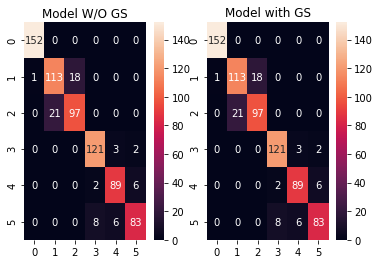

In [19]:
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
model = LogisticRegression(fit_intercept=True,max_iter=1000)
y_pred,y_pred_grid,grid_model = get_predictions(model, X_train, y_train, X_test,parameters)
lr = print_scores(y_test,y_pred,y_pred_grid,grid_model)
lr["label"] = "Logistic Regression"

In [12]:
lr

{'precision': 0.7854458974133969,
 'recall': 0.778393351800554,
 'f1_score': 0.7633745070360693,
 'accuracy': 0.778393351800554,
 'precision_g': 0.7896537715910508,
 'recall_g': 0.7811634349030471,
 'f1_score_g': 0.7664487354243606,
 'accuracy_g': 0.7811634349030471,
 'grid_best_score': 0.8143477769645994,
 'label': 'Logistic Regression'}

__Decision Tree Classifier__

train-set confusion matrix:
 [[529   0   0   0   0   0]
 [  0 491   0   0   0   0]
 [  0   0 550   0   0   0]
 [  0   0   0 477   0   0]
 [  0   0   0   0 396   0]
 [  0   0   0   0   0 444]]
training_time(HH:MM:SS.ms) - 1.86260986328125


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   24.7s finished


training_time(HH:MM:SS.ms) - 26.125422716140747


++++++++++++++Model Without Grid Search++++++++++++++++++
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       152
           SITTING       0.89      0.84      0.86       132
          STANDING       0.83      0.88      0.86       118
           WALKING       0.93      0.89      0.91       126
WALKING_DOWNSTAIRS       0.89      0.88      0.88        97
  WALKING_UPSTAIRS       0.82      0.87      0.84        97

          accuracy                           0.90       722
         macro avg       0.89      0.89      0.89       722
      weighted avg       0.90      0.90      0.90       722

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++Model With Grid Search+++++++++++++++++++=+
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       152
           SITTING       0.89      0.86      0.87   

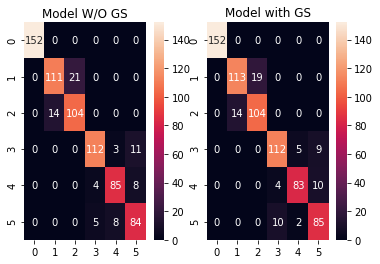

In [13]:
parameters = {'max_depth':np.arange(3,10,2)}
y_pred,y_pred_grid,grid_model = get_predictions(DecisionTreeClassifier(random_state =0), X_train, y_train, X_test,parameters)
dt = print_scores(y_test,y_pred,y_pred_grid,grid_model)
dt["label"] = "Decision Tree"

__Random Forest Claasifier__

train-set confusion matrix:
 [[529   0   0   0   0   0]
 [  0 491   0   0   0   0]
 [  0   0 550   0   0   0]
 [  0   0   0 477   0   0]
 [  0   0   0   0 396   0]
 [  0   0   0   0   0 444]]
training_time(HH:MM:SS.ms) - 4.786352872848511


Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.1min finished


training_time(HH:MM:SS.ms) - 193.3941307067871


++++++++++++++Model Without Grid Search++++++++++++++++++
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       152
           SITTING       0.95      0.94      0.94       132
          STANDING       0.93      0.94      0.94       118
           WALKING       0.98      0.98      0.98       126
WALKING_DOWNSTAIRS       0.98      0.95      0.96        97
  WALKING_UPSTAIRS       0.95      0.97      0.96        97

          accuracy                           0.97       722
         macro avg       0.96      0.96      0.96       722
      weighted avg       0.97      0.97      0.97       722

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++Model With Grid Search+++++++++++++++++++=+
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       152
           SITTING       0.94      0.93      0.94    

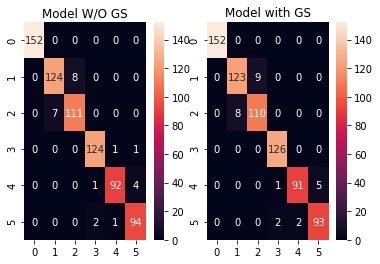

In [15]:
parameters = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
y_pred,y_pred_grid,grid_model = get_predictions(RandomForestClassifier(random_state =0), X_train, y_train, X_test,parameters)
rf = print_scores(y_test,y_pred,y_pred_grid,grid_model)
rf["label"] = "Random Forest"

__Gradient Boosting Algorithm__

In [16]:
# parameters = {'max_depth': np.arange(5,8,1), 'n_estimators':np.arange(130,170,10)}
# y_pred,y_pred_grid,grid_model = get_predictions(GradientBoostingClassifier(), X_train, y_train, X_test,parameters)
# gb = print_scores(y_test,y_pred,y_pred_grid,grid_model)
# gb["label"] = "Gradient Boosting"

__Naive Bayes Model__

train-set confusion matrix:
 [[528   0   0   0   0   1]
 [  3 271 216   0   0   1]
 [  0   7 542   0   0   1]
 [  0   0   0 332  49  96]
 [  0   0   0  42 290  64]
 [  0   0   0  12  26 406]]
training_time(HH:MM:SS.ms) - 0.529289960861206


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.7s finished


training_time(HH:MM:SS.ms) - 2.089850664138794


++++++++++++++Model Without Grid Search++++++++++++++++++
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       152
           SITTING       0.96      0.56      0.71       132
          STANDING       0.67      0.97      0.79       118
           WALKING       0.87      0.72      0.79       126
WALKING_DOWNSTAIRS       0.88      0.71      0.79        97
  WALKING_UPSTAIRS       0.66      0.93      0.77        97

          accuracy                           0.82       722
         macro avg       0.84      0.82      0.81       722
      weighted avg       0.85      0.82      0.82       722

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++Model With Grid Search+++++++++++++++++++=+
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       152
           SITTING       0.97      0.44      0.60    

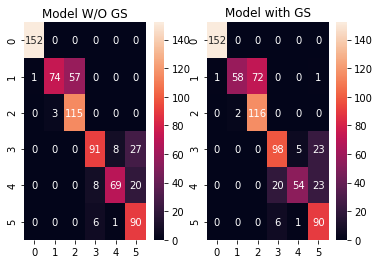

In [17]:
parameters = {'var_smoothing':[0.1,0.01,0.001,0.00001,0.0000001]}
model = GaussianNB()
y_pred,y_pred_grid,grid_model = get_predictions(model, X_train, y_train, X_test,parameters)
nb = print_scores(y_test,y_pred,y_pred_grid,grid_model)
nb["label"] = "Naive Bayes"

__Liner SVC__

C:\DATA\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


train-set confusion matrix:
 [[515  14   0   0   0   0]
 [  4 447  36   0   0   4]
 [  0 412 137   0   0   1]
 [  0 255   0 117  28  77]
 [  0  88   0   0 292  16]
 [  0 115   0   0  15 314]]
training_time(HH:MM:SS.ms) - 39.94037580490112


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  3.6min finished
C:\DATA\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


training_time(HH:MM:SS.ms) - 278.13004517555237


++++++++++++++Model Without Grid Search++++++++++++++++++
                    precision    recall  f1-score   support

            LAYING       0.98      0.96      0.97       152
           SITTING       0.39      0.94      0.55       132
          STANDING       0.89      0.33      0.48       118
           WALKING       1.00      0.23      0.37       126
WALKING_DOWNSTAIRS       0.90      0.72      0.80        97
  WALKING_UPSTAIRS       0.73      0.76      0.74        97

          accuracy                           0.67       722
         macro avg       0.81      0.66      0.65       722
      weighted avg       0.81      0.67      0.66       722

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++Model With Grid Search+++++++++++++++++++=+
                    precision    recall  f1-score   support

            LAYING       0.97      0.99      0.98       152
           SITTING       0.83      0.45      0.59   

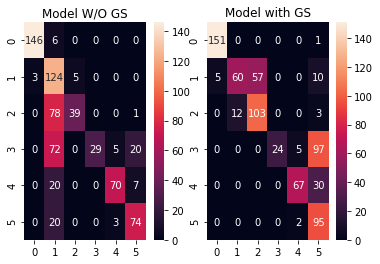

In [18]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
y_pred,y_pred_grid,grid_model = get_predictions(LinearSVC(tol=0.00005), X_train, y_train, X_test,parameters)
lsvc = print_scores(y_test,y_pred,y_pred_grid,grid_model)
lsvc["label"] = "Linear SVC"

__Kernel SVM__ 

train-set confusion matrix:
 [[101   0 347  81   0   0]
 [ 71   0 340  80   0   0]
 [ 75   0 376  99   0   0]
 [ 78   0 305  94   0   0]
 [ 70   0 261  65   0   0]
 [ 72   0 297  75   0   0]]
training_time(HH:MM:SS.ms) - 23.821752548217773


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.7min finished


training_time(HH:MM:SS.ms) - 116.9753680229187




C:\DATA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


++++++++++++++Model Without Grid Search++++++++++++++++++
                    precision    recall  f1-score   support

            LAYING       0.19      0.14      0.17       152
           SITTING       0.00      0.00      0.00       132
          STANDING       0.17      0.67      0.27       118
           WALKING       0.16      0.17      0.17       126
WALKING_DOWNSTAIRS       0.00      0.00      0.00        97
  WALKING_UPSTAIRS       0.00      0.00      0.00        97

          accuracy                           0.17       722
         macro avg       0.09      0.16      0.10       722
      weighted avg       0.10      0.17      0.11       722

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++Model With Grid Search+++++++++++++++++++=+
                    precision    recall  f1-score   support

            LAYING       0.98      0.97      0.98       152
           SITTING       0.96      0.98      0.97       132
          STANDING       0.99      0.97   

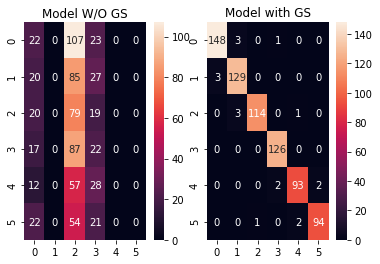

In [21]:
parameters = {'C':[2,8,16],'gamma': [ 0.0078125, 0.125, 2]}
model = SVC(kernel='rbf')
y_pred,y_pred_grid,grid_model = get_predictions(model, X_train, y_train, X_test,parameters)
svc = print_scores(y_test,y_pred,y_pred_grid,grid_model)
svc["label"] = "Kernel SVC"

__K Nearest Neighbours__

train-set confusion matrix:
 [[509  15   0   5   0   0]
 [ 16 452  23   0   0   0]
 [  0  11 531   0   0   8]
 [  5   0   0 455  17   0]
 [  0   0   3  21 335  37]
 [  0   0   8   0  28 408]]
training_time(HH:MM:SS.ms) - 1.317781686782837


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   23.9s finished


training_time(HH:MM:SS.ms) - 24.773667573928833


++++++++++++++Model Without Grid Search++++++++++++++++++
                    precision    recall  f1-score   support

            LAYING       0.92      0.91      0.91       152
           SITTING       0.86      0.89      0.88       132
          STANDING       0.91      0.91      0.91       118
           WALKING       0.90      0.96      0.93       126
WALKING_DOWNSTAIRS       0.85      0.70      0.77        97
  WALKING_UPSTAIRS       0.81      0.86      0.83        97

          accuracy                           0.88       722
         macro avg       0.87      0.87      0.87       722
      weighted avg       0.88      0.88      0.88       722

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++Model With Grid Search+++++++++++++++++++=+
                    precision    recall  f1-score   support

            LAYING       0.93      0.91      0.92       152
           SITTING       0.87      0.90      0.88   

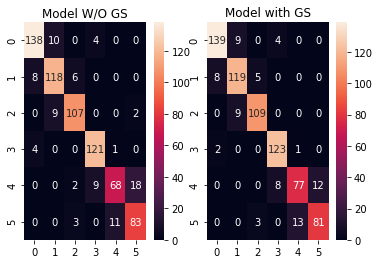

In [20]:
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski')
parameters = {'n_neighbors':[5,7,9,11],'p':[2,3,4,10]}
y_pred,y_pred_grid,grid_model = get_predictions(knn, X_train, y_train, X_test,parameters)
knn = print_scores(y_test,y_pred,y_pred_grid,grid_model)
knn["label"] = "KNN"

## 6.Model Evaluation <a id="section6"></a>

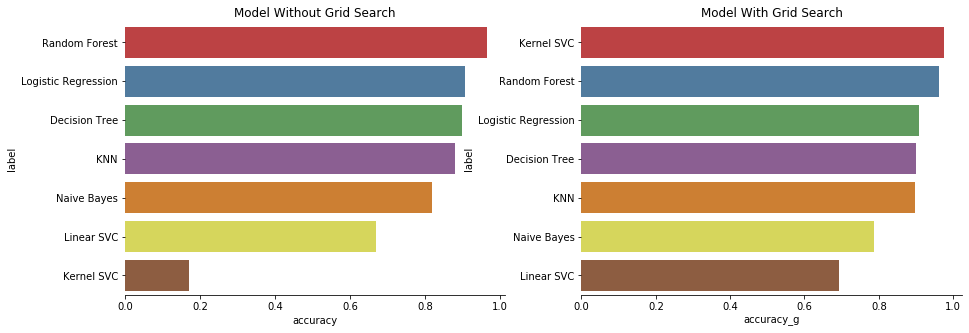

In [24]:
model_arr = [lr,dt,rf,nb,lsvc,svc,knn]     #Model result without gridsearch CV 
# Evaluation dictionary

def evaluate_models(model_arr=[]):
    evaluation_dict = {"precision":[],"recall": [],"f1_score":[],'accuracy':[],'precision_g':[],"recall_g": [],
                       'f1_score_g':[],'accuracy_g':[],'grid_best_score':[],'label':[]}
    for m in model_arr:
        evaluation_dict["label"].append(m["label"])
        evaluation_dict["precision"].append(m["precision"])
        evaluation_dict["recall"].append(m["recall"])
        evaluation_dict["f1_score"].append(m["f1_score"])
        evaluation_dict["accuracy"].append(m["accuracy"])
        evaluation_dict["precision_g"].append(m["precision_g"])
        evaluation_dict["recall_g"].append(m["recall_g"])
        evaluation_dict["f1_score_g"].append(m["f1_score_g"])
        evaluation_dict["accuracy_g"].append(m["accuracy_g"])
        evaluation_dict["grid_best_score"].append(m["grid_best_score"])

    # create a dataset out of evalution dictioanry 
    df_eval = pd.DataFrame.from_dict(evaluation_dict)
    df_eval = df_eval.sort_values(by=['accuracy','accuracy_g'],ascending=False)   #Sort dataframe based on highest accuracy
    df_eval_gs = df_eval.sort_values(by=['accuracy_g','accuracy'],ascending=False)

    f, axes = plt.subplots(1, 2, figsize=(15,5)) 
    sns.despine(left=True)
    axes[0].set(title="Model Without Grid Search")
    sns.barplot(x='accuracy', y='label', data=df_eval,ax=axes[0])
    axes[1].set(title="Model With Grid Search")
    sns.barplot(x='accuracy_g', y='label', data=df_eval_gs,ax=axes[1])
    return df_eval,df_eval_gs
df_eval,df_eval_gs= evaluate_models(model_arr)

In [25]:
df_eval

,precision,recall,f1_score,accuracy,precision_g,recall_g,f1_score_g,accuracy_g,grid_best_score,label
2,0.965477,0.965374,0.965372,0.965374,0.962672,0.962604,0.962549,0.962604,0.961898,Random Forest
0,0.906920,0.907202,0.906841,0.907202,0.906920,0.907202,0.906841,0.907202,0.912721,Logistic Regression
1,0.898909,0.897507,0.897805,0.897507,0.900215,0.898892,0.899128,0.898892,0.904053,Decision Tree
6,0.879397,0.879501,0.878170,0.879501,0.897158,0.897507,0.896896,0.897507,0.820923,KNN
3,0.852478,0.818560,0.815708,0.818560,0.833820,0.786704,0.776788,0.786704,0.796676,Naive Bayes
4,0.814549,0.667590,0.655933,0.667590,0.811581,0.692521,0.672856,0.692521,0.677840,Linear SVC
5,0.095941,0.170360,0.107813,0.170360,0.975215,0.975069,0.975060,0.975069,0.930036,Kernel SVC


__Observations:__

- Random Forest Classifier is giving best result anomg different models.
- It has accuracy close to 96.5%.
- Kernl SVC is giving best result with grid search (Hyperparameter Tunig).
- It has accuracy close to 97.5%.


## 7.Feature Selection <a id="section7"></a>

Now I have identied which algo is performing better with the dataset. Its time to find which feature I can select to increase the model accuracy. <br>
As there is lots of feature (almost 562) is present, It is very hard to identify manully which feature I can choose.<br>
I will use one unsupervised methos of feature selction that is know as __VarianceThreshold__. <br>
It removes all low-variance features. This feature selection algorithm looks only at the features (X), not the desired outputs (y). <br>

In [26]:
#Getting the features with high Variance and split the data into train and test
low_var = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
print(low_var)
X_new = pd.DataFrame(low_var.fit_transform(X))
print(X_new.shape)
X_new.head()

VarianceThreshold(threshold=0.15999999999999998)
(3609, 93)


,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,7.0,-0.997,-0.967,-0.997,-0.966,-0.941,-0.987,-0.637,-0.5150,0.968,...,-0.991,-0.988,-0.988,-1.0,-0.736,-0.956,-0.2310,0.0146,-0.190,-0.852
1,11.0,-0.995,-0.973,-0.996,-0.974,-0.940,-0.988,-0.629,-0.3970,0.969,...,-0.987,-0.983,-0.985,-1.0,-0.641,-0.923,0.5960,-0.4760,0.116,-0.852
2,14.0,-0.999,-0.991,-0.999,-0.991,-0.943,-0.997,-0.888,-0.5540,0.969,...,-0.995,-0.994,-0.996,-1.0,-1.000,-1.000,-0.0903,-0.1320,0.499,-0.850
3,15.0,-0.989,-0.817,-0.989,-0.794,-0.926,-0.904,-0.163,0.0546,0.945,...,-0.988,-0.984,-0.989,-1.0,-0.387,-0.923,-0.0587,0.0312,-0.269,-0.731
4,20.0,-0.998,-0.991,-0.998,-0.989,-0.946,-0.997,-0.806,-0.6610,0.954,...,-1.000,-0.999,-0.999,-1.0,-0.956,-1.000,0.1030,0.0661,-0.412,-0.761


__Observation__ <br>
Only 93 features has been selected out of 562.<br><br>

#### Divide the data into testing and training set

In [27]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.20, random_state=1)
print("Shape of Train X dataset is {}".format(X_train_new.shape))
print("Shape of Train y feature is {}".format(y_train_new.shape))
print("Shape of Test X dataset is {}".format(X_test_new.shape))
print("Shape of Train y feature is {}".format(y_test_new.shape))

Shape of Train X dataset is (2887, 93)
Shape of Train y feature is (2887,)
Shape of Test X dataset is (722, 93)
Shape of Train y feature is (722,)


#### Rerun the algo to check the accuracy on new dataset
I will run the 
- Random Forest Classifier 
- Kernel SVM with Grid search hyperparameter tuning.<br>
and check the results for any improvement.

train-set confusion matrix:
 [[529   0   0   0   0   0]
 [  0 491   0   0   0   0]
 [  0   0 550   0   0   0]
 [  0   0   0 477   0   0]
 [  0   0   0   0 396   0]
 [  0   0   0   0   0 444]]
training_time(HH:MM:SS.ms) - 2.210000991821289


Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.9min finished


training_time(HH:MM:SS.ms) - 114.03772926330566


++++++++++++++Model Without Grid Search++++++++++++++++++
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       152
           SITTING       0.92      0.89      0.91       132
          STANDING       0.89      0.92      0.90       118
           WALKING       0.98      0.98      0.98       126
WALKING_DOWNSTAIRS       0.97      0.92      0.94        97
  WALKING_UPSTAIRS       0.93      0.97      0.95        97

          accuracy                           0.95       722
         macro avg       0.95      0.95      0.95       722
      weighted avg       0.95      0.95      0.95       722

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++Model With Grid Search+++++++++++++++++++=+
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       152
           SITTING       0.91      0.89      0.90   

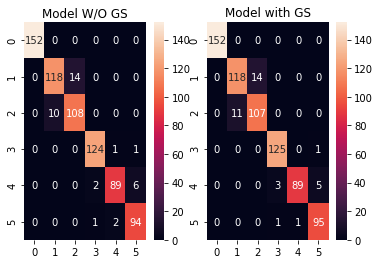

In [28]:
parameters = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
y_pred,y_pred_grid,grid_model = get_predictions(RandomForestClassifier(random_state =0), X_train_new, y_train_new, X_test_new,parameters)
rf_new = print_scores(y_test_new,y_pred,y_pred_grid,grid_model)
rf_new["label"] = "Random Forest"

train-set confusion matrix:
 [[101   0 347  81   0   0]
 [ 71   0 341  79   0   0]
 [ 75   0 376  99   0   0]
 [ 77   0 306  94   0   0]
 [ 71   0 260  65   0   0]
 [ 72   0 297  75   0   0]]
training_time(HH:MM:SS.ms) - 15.559455633163452


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.1min finished


training_time(HH:MM:SS.ms) - 77.65585446357727




C:\DATA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


++++++++++++++Model Without Grid Search++++++++++++++++++
                    precision    recall  f1-score   support

            LAYING       0.19      0.14      0.17       152
           SITTING       0.00      0.00      0.00       132
          STANDING       0.17      0.67      0.27       118
           WALKING       0.16      0.17      0.17       126
WALKING_DOWNSTAIRS       0.00      0.00      0.00        97
  WALKING_UPSTAIRS       0.00      0.00      0.00        97

          accuracy                           0.17       722
         macro avg       0.09      0.16      0.10       722
      weighted avg       0.10      0.17      0.11       722

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++Model With Grid Search+++++++++++++++++++=+
                    precision    recall  f1-score   support

            LAYING       0.97      0.97      0.97       152
           SITTING       0.96      0.98      0.97       132
          STANDING       0.99      0.97   

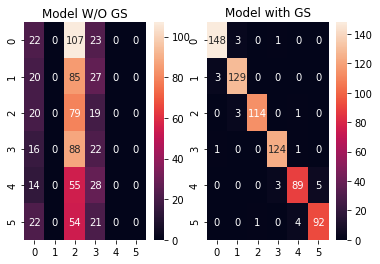

In [34]:
parameters = {'C':[2,8,16],'gamma': [ 0.0078125, 0.125, 2]}
model = SVC(kernel='rbf',probability=True)
y_pred,y_pred_grid,grid_model = get_predictions(model,  X_train_new, y_train_new, X_test_new,parameters)
svc_new = print_scores(y_test_new,y_pred,y_pred_grid,grid_model)
svc_new["label"] = "Kernel SVC"

C:\DATA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


train-set confusion matrix:
 [[528   0   0   0   0   1]
 [  2 399  89   0   0   1]
 [  0  73 475   1   0   1]
 [  0   0   0 433   6  38]
 [  0   0   0  11 365  20]
 [  0   2   2  20   6 414]]
training_time(HH:MM:SS.ms) - 2.778972625732422


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   41.9s finished
C:\DATA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


training_time(HH:MM:SS.ms) - 46.92092561721802


++++++++++++++Model Without Grid Search++++++++++++++++++
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       152
           SITTING       0.81      0.82      0.82       132
          STANDING       0.80      0.79      0.79       118
           WALKING       0.90      0.89      0.90       126
WALKING_DOWNSTAIRS       0.93      0.86      0.89        97
  WALKING_UPSTAIRS       0.81      0.90      0.85        97

          accuracy                           0.88       722
         macro avg       0.88      0.87      0.87       722
      weighted avg       0.88      0.88      0.88       722

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++Model With Grid Search+++++++++++++++++++=+
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       152
           SITTING       0.79      0.79      0.79    

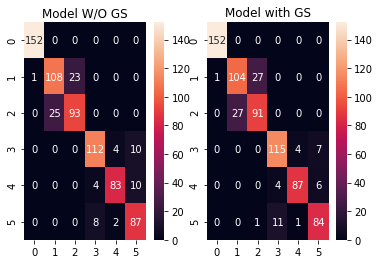

In [32]:
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
model = LogisticRegression(fit_intercept=True,max_iter=1000)
y_pred,y_pred_grid,grid_model = get_predictions(model,  X_train_new, y_train_new, X_test_new,parameters)
lr_new = print_scores(y_test_new,y_pred,y_pred_grid,grid_model)
lr_new["label"] = "Logistic Regression"

__Evaluate Model on New data set__

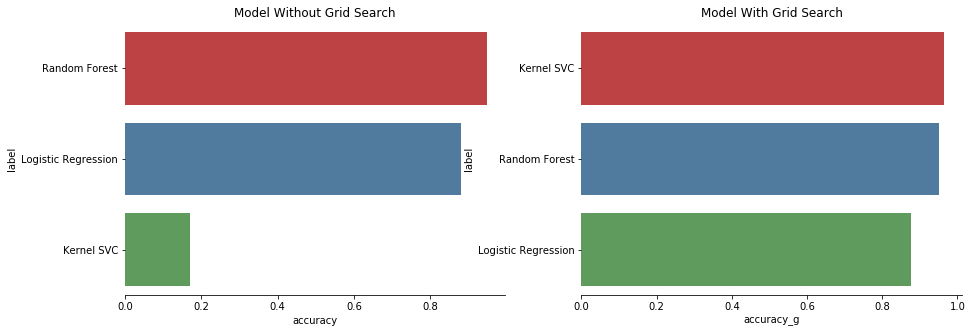

In [35]:
df_eval,df_eval_gs= evaluate_models([svc_new,rf_new,lr_new])

In [36]:
df_eval

,precision,recall,f1_score,accuracy,precision_g,recall_g,f1_score_g,accuracy_g,grid_best_score,label
1,0.949147,0.948753,0.948727,0.948753,0.950615,0.950139,0.950076,0.950139,0.942500,Random Forest
2,0.880795,0.879501,0.879626,0.879501,0.877044,0.876731,0.876756,0.876731,0.889158,Logistic Regression
0,0.095640,0.170360,0.107757,0.170360,0.964049,0.963989,0.963946,0.963989,0.916529,Kernel SVC


__Observation__
- For Random forest classifier there is not improvement after feature selection process.
- For Kernel SVM also there is not much improvement with Grid Search approach. 

## 8. Conclusion <a id="section8"></a>

- Random Forest Classification without Grid search tuning is the best model to predict the activity on new dataset.
- With Grid Search Tuning Kernel SVM is the best model to predict activities.
- There is not much improvement after feature selection on both the models.